# Pengenalan Pola

## Tugas 1: Model Probabilistik untuk Klasifikasi Gambar

### Mekanisme

Anda hanya diwajibkan untuk mengumpulkan file ini saja ke uploader yang disediakan di http://elearning2.uai.ac.id/. Ganti nama file ini saat pengumpulan menjadi **tugas1_NIM.ipynb**.

**Keterlambatan**: Pengumpulan tugas yang melebihi tenggat yang telah ditentukan tidak akan diterima. Keterlambatan akan berakibat pada nilai nol untuk tugas ini.

**Kolaborasi**: Anda diperbolehkan untuk berdiskusi dengan teman Anda, tetapi dilarang keras menyalin kode maupun tulisan dari teman Anda.

### Petunjuk

Terdapat enam packages yang Anda akan gunakan dalam mengerjakan tugas ini, yaitu:

- matplotlib
- numpy
- pandas
- scipy
- seaborn
- scikit-learn

Anda diperbolehkan (jika dirasa perlu) untuk mengimpor modul tambahan untuk tugas ini, kecuali dijelaskan sebaliknya. Namun, seharusnya modul yang tersedia sudah cukup untuk memenuhi kebutuhan Anda.

Pastikan jawaban Anda singkat, padat, dan jelas. Mayoritas pertanyaan yang diberikan dapat dijawab dalam 3-4 kalimat saja.

**Nilai akhir: XX/60**

In [1]:
import mnist_reader
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline

In [2]:
X_train, y_train = mnist_reader.load_mnist('../datasets', kind='train')
X_test, y_test = mnist_reader.load_mnist('../datasets', kind='t10k')

### Deskripsi Dataset

Dalam tugas ini, Anda diminta mengeksplorasi data gambar pakaian yang telah disesuaikan seperti kasus MNIST. Data ini dikenal dengan nama [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Gambar-gambar ini berukuran 28x28 dalam *grayscale*. Keterangan lebih lengkap tentang data ini dapat dilihat di:

**Fashion-MNIST: a Novel Image Dataset for Benchmarking Machine Learning Algorithms. Han Xiao, Kashif Rasul, Roland Vollgraf. [arXiv:1708.07747](http://arxiv.org/abs/1708.07747)**

## 1. Eksplorasi Dataset

Sebelum memulai melakukan pemodelan, ada baiknya bagi Anda untuk melakukan eskplorasi data dengan bantuan visualisasi.

### Soal 1.1 (3 poin)

Visualisasikan 10 gambar pertama dalam `X_train`.

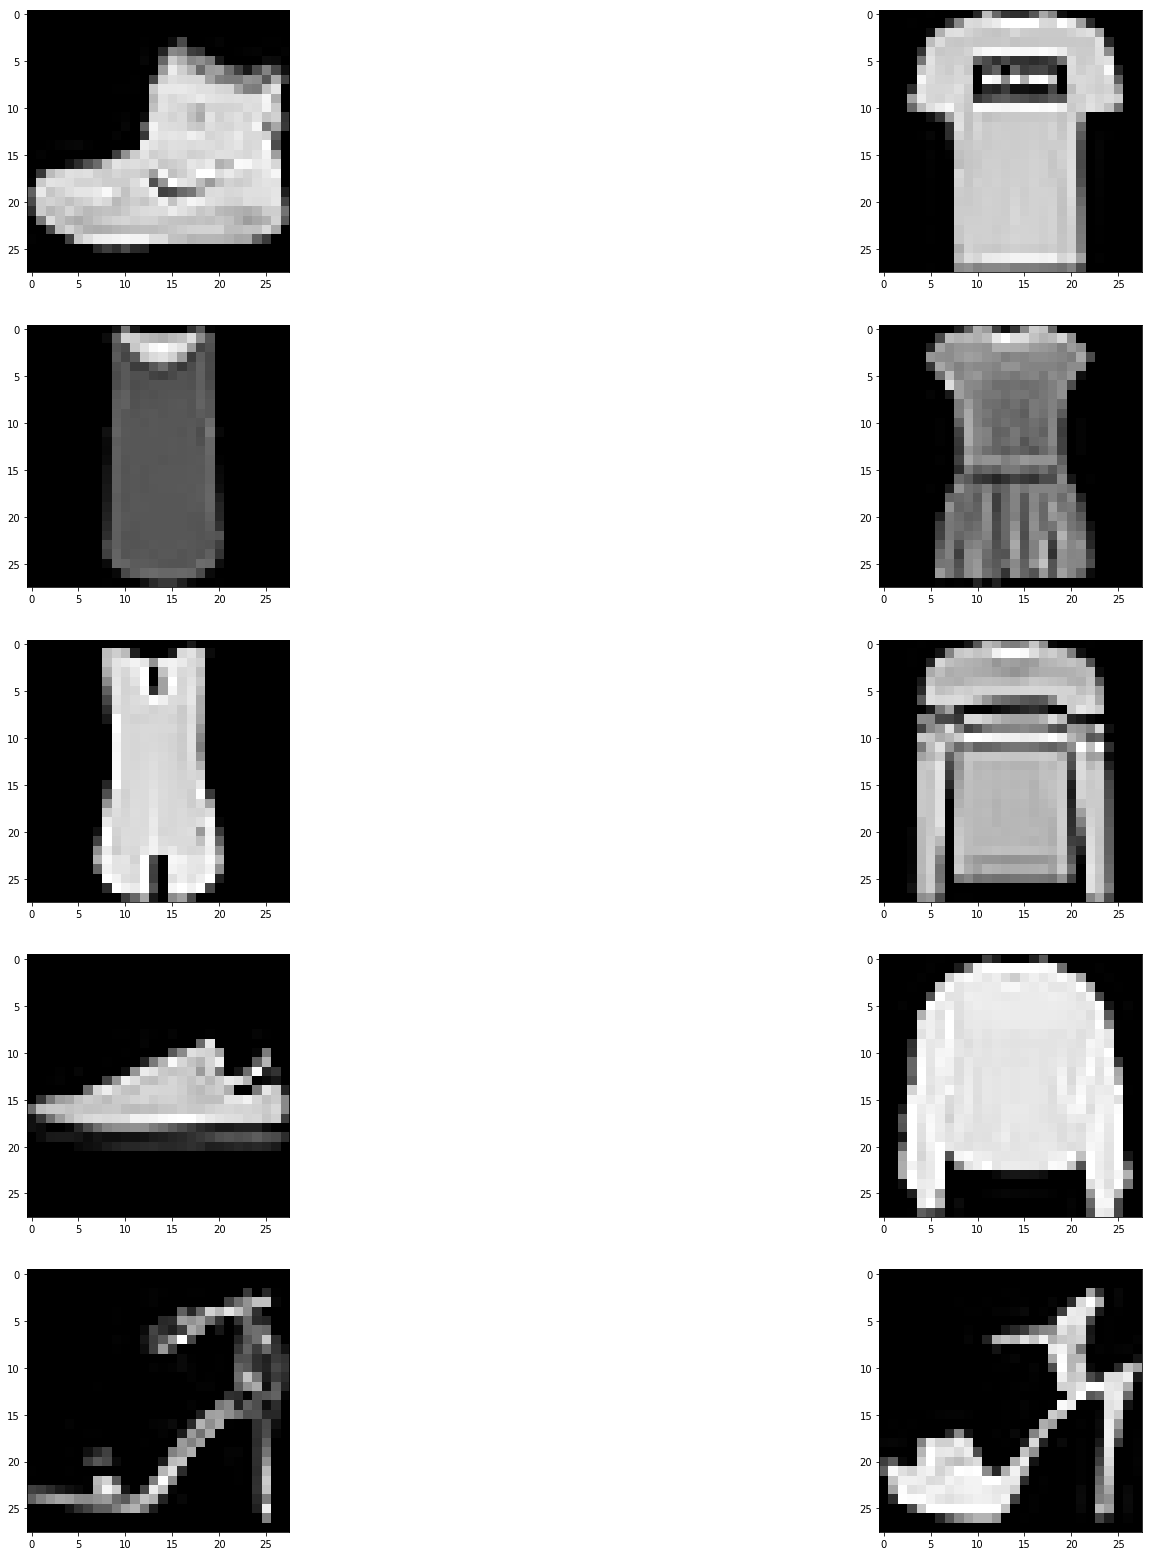

In [3]:
fig = plt.figure(figsize=(28,28))
columns = 2
rows = 5
plt.gray()
for i in range(1, (columns*rows )+ 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[i-1].reshape(28,28))
    
plt.show()

### Soal 1.2 (4 poin)

Data fashion-mnist punya 10 kelas. Coba gambarkan gambar rata-rata untuk tiap kelas, i.e. nilai pixel di posisi yang sama dirata-rata untuk seluruh gambar yang ada dalam kelas tersebut.

*Petunjuk: Gunakan konsep masking.*

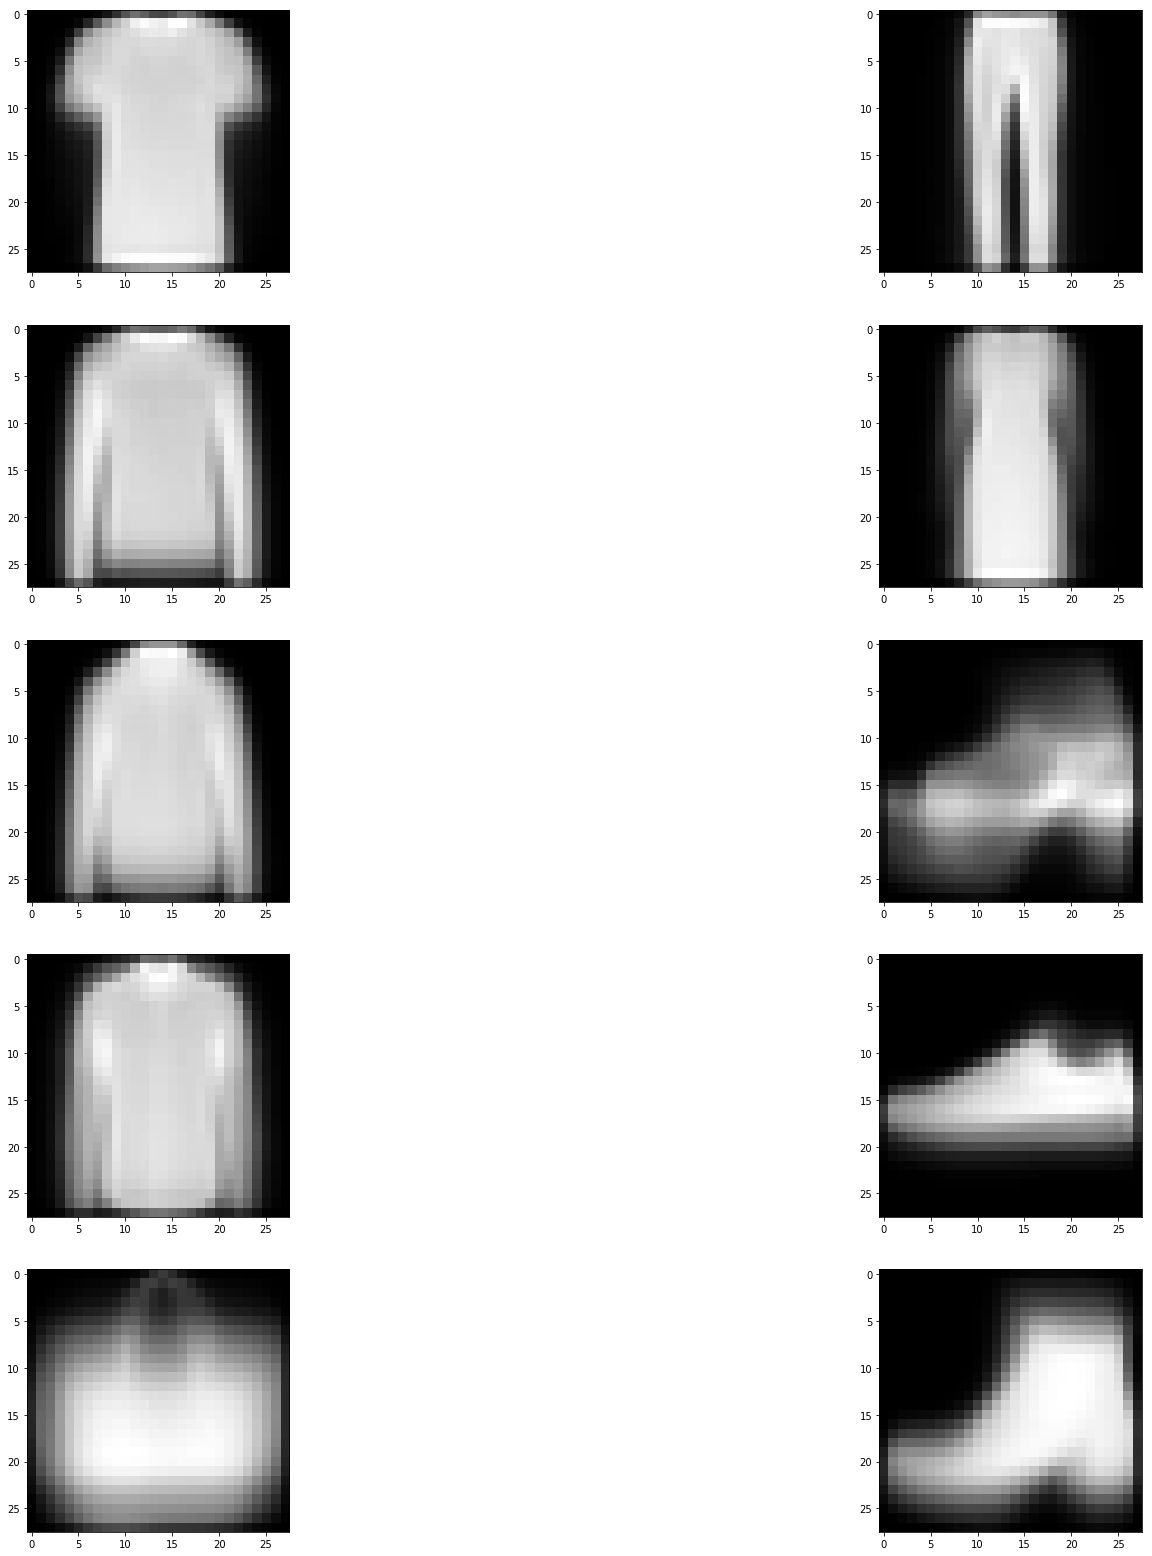

In [4]:
X=[]
for i in range(784):
    X+=[0]
    
X_train_mu=[]
for i in range(10):
    X_train_mu+=[X]
    
for i in range(60000):
    X_train_mu[y_train[i]]+=X_train[i]

X_train_mu=np.array(X_train_mu)
X_train_mu=X_train_mu//6000

fig = plt.figure(figsize=(28,28))
columns = 2
rows = 5
plt.gray()
for i in range(1, (columns*rows )+ 1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train_mu[i-1].reshape(28,28))
    
plt.show()

### Soal 1.3.a (3 poin)

Gambarkan [KDE plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) yang dicocokkan dengan nilai pixel pada posisi (5,5) dari objek-objek dalam tiap kelas. Atur agar limit sumbu x adalah [0,255].

C:\Users\Kamil\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Kamil\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Kamil\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\Users\Kamil\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


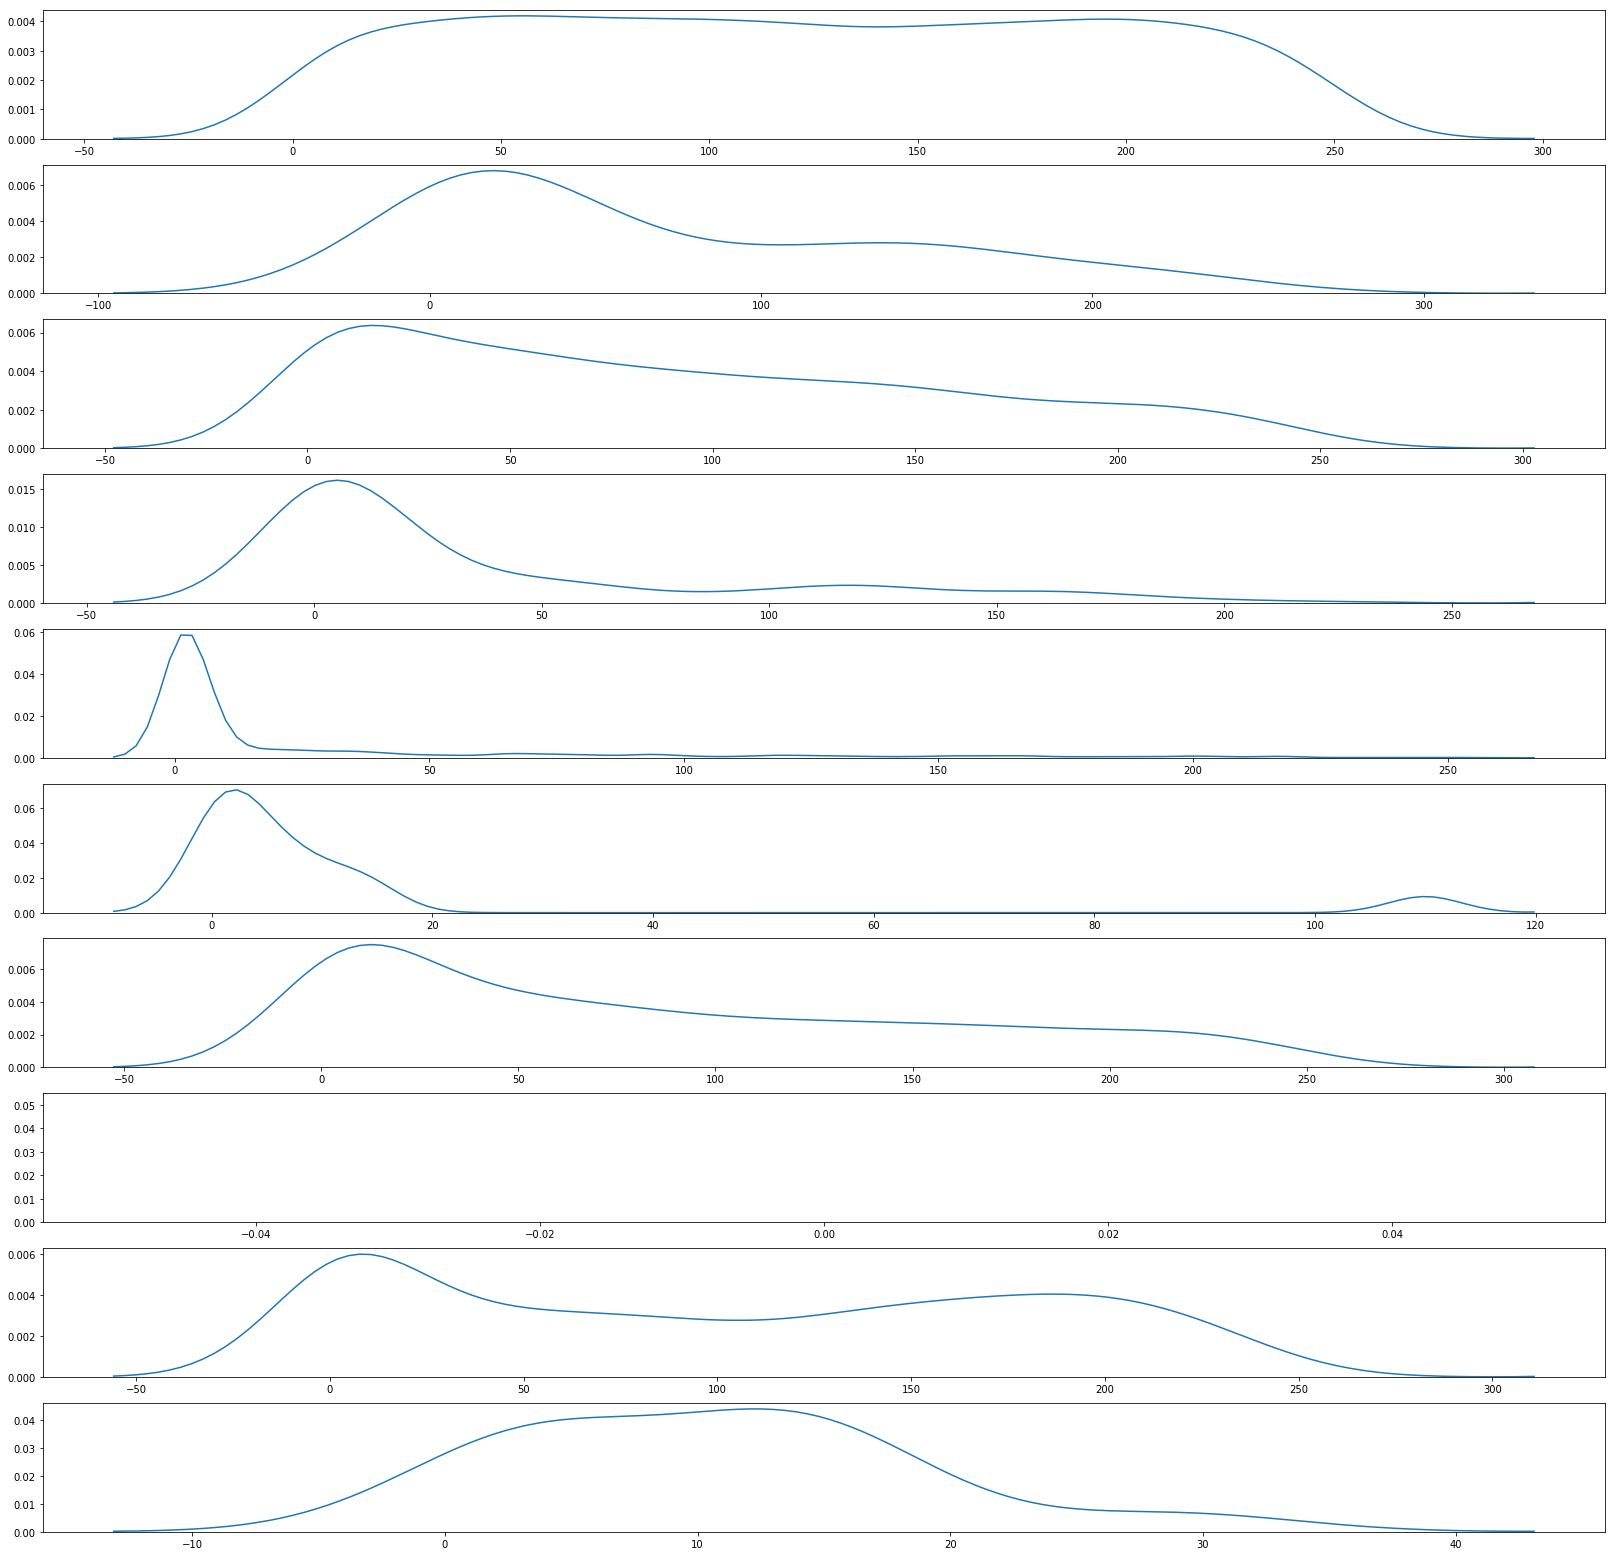

In [5]:
X_train_c=[]
for i in range(10):
    X_train_c+=[[]]

for i in range(60000):
    X_train_c[y_train[i]]+=[X_train[i][(28*5)+5-1]]
        
X_train_c=np.array(X_train_c)
  
#np.unique(X_train_c[4])
#sns.kdeplot(X_train_c[7])

fig = plt.figure(figsize=(28,28))
columns = 1
rows = 10
for i in range(1, (columns*rows )+ 1):
    fig.add_subplot(rows, columns, i)
    sns.kdeplot(X_train_c[i-1], clip=(0,255))
    
plt.show()

### Soal 1.3.b (2 poin)

Pada dasarnya KDE plot adalah estimasi distribusi dalam bentuk kontinu dari histogram yang dihasilkan. Apa yang dapat Anda perhatikan dari distribusi yang terbentuk pada soal 1.3.a?

Pada kelas ke 7 (sneakers) KDE plot tidak muncul. Hal ini dikarenakan untuk kelas sneakers, pixel (5,5) hanya berisi 0 atau 6.

### Soal 1.4.a (4 poin)

Mari kita sederhanakan kasusnya sejenak. Ambil pixel pada posisi (5,5) dari objek-objek dalam kelas 0 dan 8 (kelas t-shirt dan tas). Gambarkan **histogram** dari objek-objek dalam masing-masing kelas tersebut. Lalu, cocokkan distribusi Gaussian ke masing-masing histogram tersebut. Warnai MLE dari Gaussian tersebut sesuai dengan warna histogram dari kelas yang dicocokkan.

*Petunjuk: Gunakan `sns.distplot()` untuk menggambar histogramnya.*

C:\Users\Kamil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


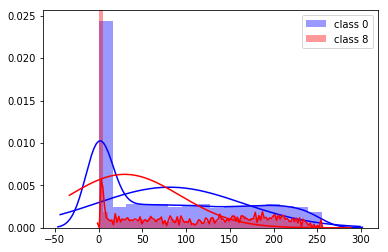

In [6]:
from scipy.stats import norm

X_train0 = X_train_c[0]
X_train8 = X_train_c[8]

sns.distplot(X_train0, norm_hist=True, fit=norm, fit_kws={'color':'b'}, label='class 0', color='b')
sns.distplot(X_train8, norm_hist=True, fit=norm, fit_kws={'color':'r'}, label='class 8', color='r')
plt.legend()

### Soal 1.4.b (2 poin)

Gambarkan grafik dengan ketentuan seperti pada soal 1.4.a, tetapi kali ini gunakan pixel (20,20).

C:\Users\Kamil\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


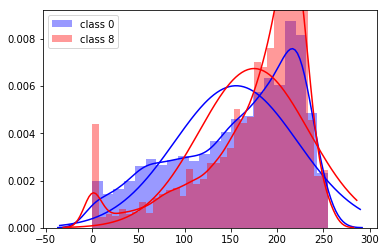

In [7]:
X_train0_20_20 = []
X_train8_20_20 = []

for i in range(60000):
    if y_train[i]==0:X_train0_20_20 += [X_train[i][(28*20)+20-1]]
    if y_train[i]==8:X_train8_20_20 += [X_train[i][(28*20)+20-1]]
        
X_train0_20_20 = np.array(X_train0_20_20)
X_train8_20_20 = np.array(X_train8_20_20)

sns.distplot(X_train0_20_20, norm_hist=True, fit=norm, fit_kws={'color':'b'}, label='class 0', color='b')
sns.distplot(X_train8_20_20, norm_hist=True, fit=norm, fit_kws={'color':'r'}, label='class 8', color='r')
plt.legend()

### Soal 1.5.a (2 poin)

Gambarkan scatter plot dari nilai pixel di posisi (5,5) dan (20,20) untuk kelas 0 dan 8. Bedakan antara titik dari kelas 0 dan 8.

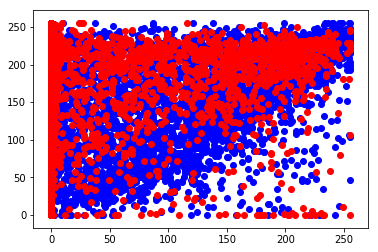

In [8]:
plt.scatter(X_train0, X_train0_20_20, color='b')
plt.scatter(X_train8, X_train8_20_20, color='r')

### Soal 1.5.b (5 poin)

Gambarkan contour plot dari bivariate Gaussian dengan atribut pixel (5,5) dan (20,20) untuk kelas 0 dan 8. Jangan lupa untuk menggunakan *full covariance matrix*.

C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  """
C:\Users\Kamil\Anaconda3\lib\site-packages\matplotlib\contour.py:1173: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
C:\Users\Kamil\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The bivariate_normal function was deprecated in version 2.2.
  # This is added back by InteractiveShellApp.init_path()


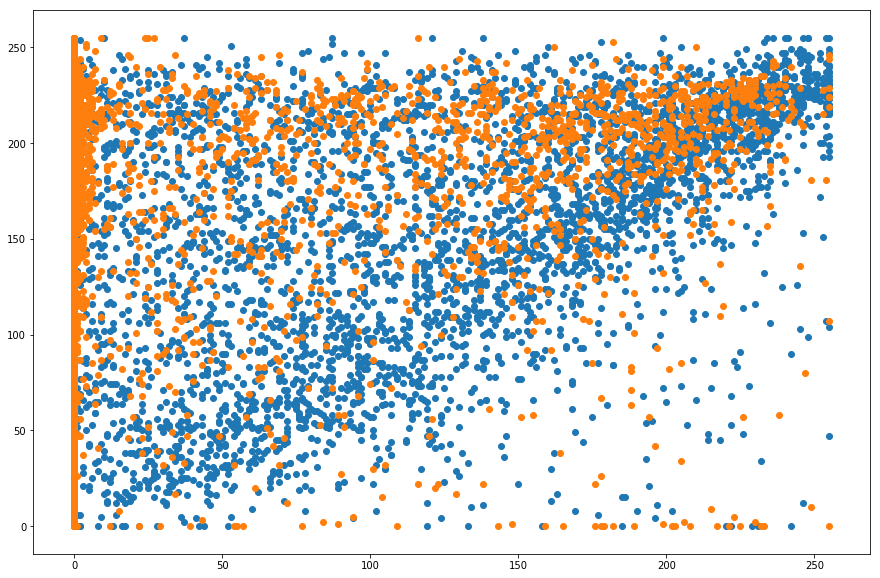

In [9]:
from matplotlib.mlab import bivariate_normal

fig, ax = plt.subplots(figsize=(15,10))
X0_1, X0_2 = np.meshgrid(X_train0, X_train0_20_20)
z = bivariate_normal(X0_1, X0_2, X_train0.std(), X_train0_20_20.std(), X_train0.mean(), X_train0_20_20.mean())

ax.scatter(X_train0, X_train0_20_20)
ax.contour(X0_1, X0_2, z, levels=[0.01, 0.1, 0.5, 0.9], alpha=0.2)

X8_1, X8_2 = np.meshgrid(X_train8, X_train8_20_20)
z = bivariate_normal(X8_1, X8_2, X_train8.std(), X_train8_20_20.std(), X_train8.mean(), X_train8_20_20.mean())

ax.scatter(X_train8, X_train8_20_20)
ax.contour(X8_1, X8_2, z, levels=[0.01, 0.1, 0.5, 0.9], alpha=0.2)

### Soal 1.6 (5 poin)

Berikan kesimpulan dari eksplorasi yang telah Anda lakukan sejauh ini.

*Jawaban Anda di sini*

## 2. Model Selection

Kita akan mencoba menghitung likelihood dari salah satu atribut dalam data.

### Soal 2.1 (2 poin)

Ambil nilai pixel (20,20) dari objek-objek dalam kelas 0 (t-shirt). Gambarkan kembali histogramnya.

(array([ 262.,  281.,  441.,  424.,  470.,  586.,  756.,  907., 1284.,
         589.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

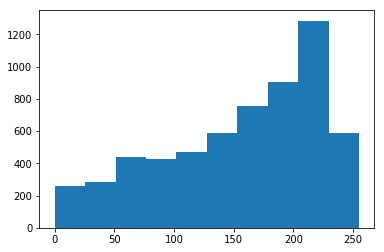

In [10]:
plt.hist(X_train0_20_20)

### Soal 2.2.a (8 poin)

Kita akan mengasumsikan dua model yang mungkin pada data soal 2.1, yaitu:

- $\mathcal{M} = 1$ - dari distribusi uniform dengan $\alpha=0$ dan $\beta=255$
- $\mathcal{M} = 2$ - dari distribusi normal dengan $\mu = 125$ dan $\sigma^2 = 6095$

Lengkapi dan isi rumus log-likelihood untuk model 1 dan 2 di bawah ini, lalu hitunglah log-likelihood dari kedua model tersebut.

*Sanity check: Nilai log-likelihood $\leq 0$*

*Petunjuk: Gunakan [situs ini](https://www.codecogs.com/latex/eqneditor.php) untuk membantu menulis persamaan dalam LaTeX.*

Untuk model 1:

\begin{align*}
L(\mathcal{M}_1) &= \prod_{i=1}^{N} p(x_i|\alpha,\beta) \\
L(\mathcal{M}_1) &= (\tfrac{1}{(\beta -\alpha )})^{N} \\
\ln L(\mathcal{M}_1) &= \ln ((\tfrac{1}{(\beta -\alpha )})^{N}) \\
\ln L(\mathcal{M}_1) &= N \times (\ln (1) - \ln (\beta -\alpha )) \\
\ln L(\mathcal{M}_1) &= N \times (0 - \ln (\beta -\alpha ))\\
\ln L(\mathcal{M}_1) &= -N(\ln (\beta -\alpha )) \\
\ln L(\mathcal{M}_1) &= -N(\ln (255 - 0)) \\
\ln L(\mathcal{M}_1) &= -N(\ln (255)) \\
\end{align*}

Untuk model 2:

\begin{align*}
L(\mathcal{M}_2) &= \prod_{i=1}^{N} p(x_i|\mu,\sigma^2) \\
L(\mathcal{M}_2) &= \frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{1} - \mu )^2}{2\sigma ^2})\times ... \times \frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{N} - \mu )^2}{2\sigma ^2}) \\
\ln (L(\mathcal{M}_2)) &= \ln (\frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{1} - \mu )^2}{2\sigma ^2})\times ... \times \frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{N} - \mu )^2}{2\sigma ^2})) \\
\ln (L(\mathcal{M}_2)) &= \ln (\frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{1} - \mu )^2}{2\sigma ^2}))+ ... + \ln (\frac{1}{\sqrt{2 \pi \sigma^2}}\exp (-\frac{(x_{N} - \mu )^2}{2\sigma ^2})) \\
\end{align*}

In [11]:
L = 0
for i in range(len(X_train0_20_20)):
    a = np.log(1/np.sqrt(2*np.pi*6095))*np.exp(-(((X_train0_20_20[i]-125)**2)/(2*(6095**2))))
    L+=a

print ("Log-likelihood model 1:", -6000*(np.log(255)))
print ("Log-likelihood model 2:", L)

Log-likelihood model 1: -33247.581270950555
Log-likelihood model 2: -31657.0217899992


### Soal 2.2.b (2 poin)

Berdasarkan kedua perhitungan pada soal 2.2.a, model mana yang lebih cocok menggambarkan data? Mengapa?

Normal distribution, karena berdasarkan nilai log-likelihood nya, model 2 besar.

### Soal 2.3.a (4 poin)

Hitung log-likelihood dari distribusi Gaussian dengan $\mu \in [101,150]$ dan $\sigma = 78$. Gambarkan nilainya dalam line plot. Jangan lupa untuk memberikan label pada sumbu-sumbunya.

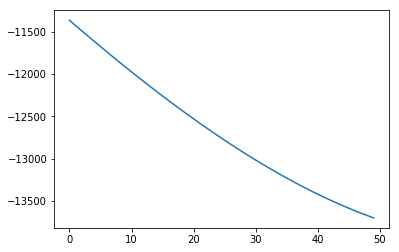

In [12]:
L = []
for i in range(101, 151):
    K=0
    for j in range(len(X_train0_20_20)):
        a = np.log(1/np.sqrt(2*np.pi*78))*np.exp(-(((X_train0_20_20[j]-i)**2)/(2*(78**2))))
        K+=a
    L+=[K]
plt.plot(L)

### Soal 2.3.b (1 poin)

Berapa nilai $\mu$ dari soal 2.3.a yang memaksimalkan nilai log-likelihood-nya?

In [13]:
np.min(L)

-13698.046445260145

### Soal 2.4 (3 poin)

Berikan kesimpulan yang Anda dapatkan dari bagian ini.

Nilai log-likelihood pada uniform distribution hanya berubah berdasarkan jumlah N nya, karena peluangnya dianggap seragam. Untuk nilai log-likelihood dari normal distribution akan semakin bagus ketika jarak antara mu dan sigma semakin kecil.

## 3. Naive Bayes

Apakah algoritma Naive Bayes bisa menghasilkan akurasi yang cukup baik dalam kasus ini?

In [14]:
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

### Soal 3.1 (4 poin)

Coba latih model Gaussian Naive Bayes pada data latih dengan menggunakan modul dari scikit-learn. Lalu, prediksi kelas dari `X_test`. Hitung akurasi dari model yang dihasilkan dan gambarkan heatmap dari *confusion matrix* yang dihasilkan.

Accuracy score:  0.5856


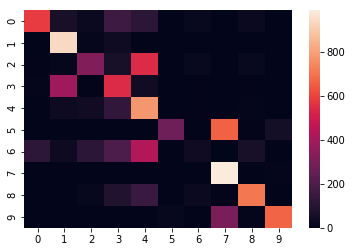

In [15]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred))

### Soal 3.2 (2 poin)

Seberapa baik kah hasil yang kita dapatkan di soal 3.1? Coba buat perbandingan dengan menggunakan [`DummyClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html). Hitung akurasinya dan gambarkan heatmap dari *confusion matrix*-nya.

*Petunjuk: Jika kode Anda pada 3.1 benar, maka hanya ada satu baris yang perlu diganti.*

Accuracy score:  0.1024


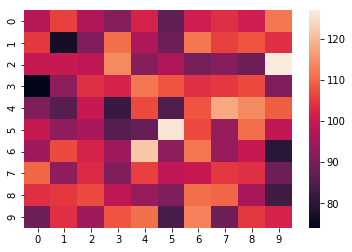

In [16]:
clf = DummyClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("Accuracy score: ", accuracy_score(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred))

### Soal 3.3 (4 poin)

Berikan kesimpulan Anda dari keseluruhan eksplorasi yang Anda lakukan pada tugas ini. Kira-kira, apa yang bisa dilakukan untuk meningkatkan hasil dari model Naive Bayes?

Untuk kasus ini hasil menggunakan Gaussian distribution lebih baik dibandingkan dummy classifier.

Untuk memperbaiki hasil model dari naive bayes, bisa dengan melakukan assignment pada pixel dengan nilai 0.